# Understanding negative pressure gradients at the pole

Let $Y:=  \{(z_i,\theta_i)\}_{i\in\{1,\ldots,N+1\}}$ be the set of support points of the target measure, where $N\in\mathbb{N}$ is the number of actual data points, and $(z_{N+1},\theta_{N+1})$ is the arbitrary extra point corresponding to the top cell. The $s$ coordinate is taken to be in an interval $[s_{\mathrm{min}},s_{\mathrm{max}}]\subset (0,1)$. The source domain is then $X := [s_{\mathrm{min}},s_{\mathrm{max}}]\times [p_{\mathrm{min}},+\infty)$. The cost function $c:X\times Y\to [0,+\infty)$ is then given by

$$
c((s,p),(z,\theta)) =  
\begin{cases}
\displaystyle{
\frac{1}{2}\left(\frac{z^2}{a^2(1-s^2)} - 2\Omega z + \Omega^2a^2(1-s^2)\right)
+C_{\mathrm{p}}\theta\left(\frac{p}{p_{00}}\right)^\kappa \quad \text{if}\quad i\in \{1,\ldots,N\}
}\\\\
0 \quad \text{if} \quad i=N+1.
\end{cases}
$$

Let $\psi\in \mathbb{R}^{N+1}$ denote the optimal dual potential from the OT problem. The final component of $\psi$ corresponds to the top cell. 

If $N=1$, and the pressure surface $\bar{p}:[s_{\mathrm{min}},s_{\mathrm{max}}]\to[0,+\infty)$ is positive, then it satisfies the relation

$$
c((s,\bar{p}(s)),(z_1,\theta_1)) - \psi_1 = -\psi_{2},
$$

which can be inverted to give

$$
\bar{p}(s) = 
p_{00}
\left(
\frac{1}{C_p\theta_1}
\left(\psi_1-\psi_{2} - 
    \frac{1}{2}\left(\frac{z_1^2}{a^2(1-s^2)}-2\Omega z_1 + \Omega^2a^2(1-s^2)\right)\right)
    \right)^{\frac{1}{\kappa}}.
$$

More generally, it holds that

$$
\bar{p}(s) = \underset{i\in \{1,\ldots,N\}}{\max} \bar{p}_i(s),
$$

where $\bar{p}_i:[s_{\mathrm{min}},s_{\mathrm{max}}]\to[0,+\infty)$ satisfies

$$
c((s,\bar{p}_i(s)),(Z_i,\Theta_i)) - \psi_i = -\psi_{N+1}
$$

whenever $\bar{p}_i(s)>0$. (This is what we prove in our paper.) This inverts to give

$$
\bar{p}_i(s) = 
p_{00}
\left(
\frac{1}{C_p\theta_i}
\left(\psi_i-\psi_{N+1} - 
    \frac{1}{2}\left(\frac{z_i^2}{a^2(1-s^2)}-2\Omega z_i + \Omega^2a^2(1-s^2)\right)\right)
    \right)^{\frac{1}{\kappa}}.
$$

(As a sanity check, I have plotted these functions below to verify that their maximum coincides with the pressure surface given by the Laguerre cell boundary in the OT solution.)

The derivative of $\bar{p}_i$ is

$$
\bar{p}_i'(s) = \frac{p_{00}}{\kappa}\left(
\frac{1}{C_p\theta_i}\right)^{\frac{1}{\kappa}}\left(\bar{p}_i(s)\right)^{(1-\kappa)}s\left(1-\frac{z^2_i}{a^4\Omega^2}\frac{1}{(1-s^2)^2}\right).
$$
The factor
$$
\frac{p_{00}}{\kappa}\left(
\frac{1}{C_p\theta_i}\right)^{\frac{1}{\kappa}}\left(\bar{p}_i(s)\right)^{(1-\kappa)}s
$$
is non-negative for all $s\in [s_{\mathrm{min}},s_{\mathrm{max}}]$. So we are concerned with the sign of the factor 

$$
f_i(s) := 1-\frac{z^2_i}{a^4\Omega^2}\frac{1}{(1-s^2)^2}
$$

as $s\to 1$. Since all physical constants and $z_i$ are positive, $f_i(s)$ is decreasing with $s$, and $f_i(s)\to -\infty$ as $s\to 1$, and quickly! (With quadratic rate.)

This means that whatever discretisation we choose, the pressure surface will necessarily have strong negative gradient sufficiently close to the pole. Since we expect zonal angular momentum to be minimal near the pole, the point where the pressure gradient becomes very negative essentially depends on the minimum $z_i$. This can inform how we choose the range $[s_{\mathrm{min}},s_{\mathrm{max}}]$ of $s$. One option may be to find the index $i$ such that $z_i$ is minimal, and then set $s_{\mathrm{max}}$ to be such that $f_i(s)\geq 0$ for all $s\in [s_{\mathrm{min}},s_{\mathrm{max}}]$. Since $f_i$ is decreasing, we could choose $s_{\mathrm{max}}$ such that

$$
1-\frac{z^2_i}{a^4\Omega^2}\frac{1}{(1-s_{\mathrm{max}}^2)^2} = 0,
$$

that is

$$
s_{\mathrm{max}} = \left(1- \frac{z_i}{a^2\Omega}\right)^{\frac{1}{2}}.
$$

As we see below, for the LC1 simulation, $s_\mathrm{crit}=0.9980...$ while $s_{\mathrm{max}}=0.9999...$, which is why there is a steep negative pressure gradient in the surface pressure.

It is important to remember that the OT problem is non-local, so changing $s_{\mathrm{max}}$ will change the entire solution, rather than just truncating it.

## Solve OT problem

In [1]:
import atmosphere_bgs
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.ndimage import gaussian_filter

In [2]:
# solve OT problem
interpolate=True
ny = None
nextra = 0
pmin =10
data = atmosphere_bgs.DataLoader("../data/bs_lc1low2001010000",pmin=pmin,nextra=nextra,ny=ny,interpolate=interpolate)
if interpolate is True:
    print('Number of intervals in interpolation: ', data.ny)
    
solv = atmosphere_bgs.OTSolver(data, ot_tol=1e-4, boundary_res=2000)
solv.get_bgs(verbose=False)

Number of intervals in interpolation:  256


## Check critical s and maximum s used in simulation

In [3]:
# extract parameters and define surface pressure function
a = data.pp.a
Omega = data.pp.Omega
p00 = data.pp.p00
kappa = data.pp.kappa
cp = data.pp.cp

y = solv.y
zmin = np.min(y[:,0])
s_crit = np.sqrt(1-zmin/a**2/Omega)

print('Critical s is ', s_crit)
print('Maximum s is ', solv.sp.smax)

Critical s is  0.9980475827924636
Maximum s is  0.999988978809688


## Plot surface pressure given by Laguerre cell boundary, and all $\bar{p}_i$'s

Here I only take every 100-th index $i$ and plot $\bar{p}_i$ so that the figure isn't too cluttered, and I also plot the surface pressure. You can see that the maximum of the $\bar{p}_i$'s coincides with the pressure surface.

In [4]:
def get_pi(s,i,duals,y):
    '''returns value of ith pressure surface at s'''
    zi = y[i,0]
    thi = y[i,1]
    f1 = (1/cp/thi)*(duals[i] - duals[-1] - (1/2)*(zi**2/a**2/(1-s**2) - 2*Omega*zi + (Omega**2)*(a**2)*(1-s**2)))
    f1 = np.max(np.vstack((f1,np.zeros(f1.shape))),axis=0)
    return p00*f1**(1/kappa)

In [5]:
s = np.linspace(0.01,0.999,1000)
duals = solv.ld.duals

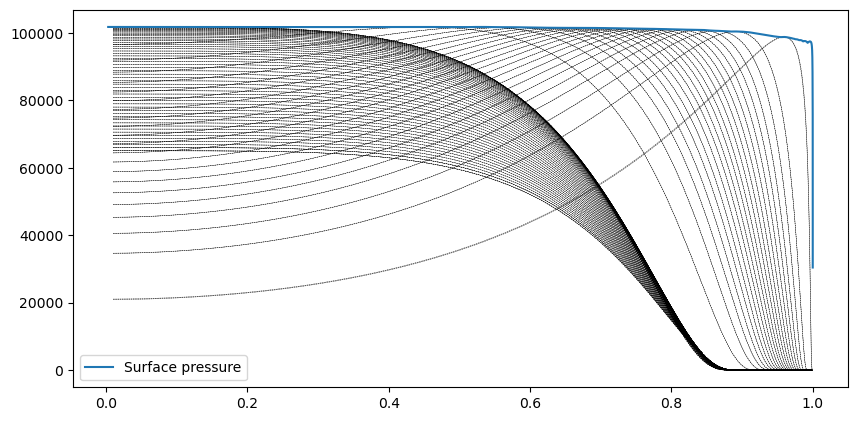

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=100)

# individual p_i's
for i, _ in enumerate(data.y[::100]):
    pi = get_pi(s,i,duals,y)
    ax.plot(s,pi,c='k',ls='--',lw=.3)

# surface pressure as given by Laguerre cell boundary
n = solv.y.shape[0]
edges = [e for e in solv.ld.edglist if e.pj >= n+6]
edge_pts = np.unique(np.vstack([e.ls.x for e in edges]),axis=0)
idx = np.argsort(edge_pts[:,0])
pressure_surface = edge_pts[idx]
ax.plot(pressure_surface[:,0],pressure_surface[:,1],label='Surface pressure')

ax.legend()